In [1]:
import pandas as pd

retail_sales_df=pd.read_csv('us_retail_sales.csv')
retail_sales_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [2]:
retail_sales_df.shape

(30, 13)

In [3]:
# Transpose Data
Transpose_retail_sales_df=pd.melt(retail_sales_df, id_vars =['YEAR'])
Transpose_retail_sales_df.head()

,YEAR,variable,value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [4]:
# Check Nulls
Transpose_retail_sales_df.isnull().sum()

YEAR        0
variable    0
value       6
dtype: int64

In [5]:
# Drop Nulls
Transpose_retail_sales_df.dropna(inplace=True)
Transpose_retail_sales_df.isnull().sum()
Transpose_retail_sales_df.head()

,YEAR,variable,value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [6]:
import datetime as dt

#convert date and hour to str, concatenate them and then convert them to datetime format.
Transpose_retail_sales_df['new_date'] = Transpose_retail_sales_df[['YEAR','variable']].astype(str).apply(lambda x: dt.datetime.strptime(x.YEAR + x.variable+'1', '%Y%b%d'), axis=1)

In [7]:
# Order the values and set the new date field as the index

final_retail_sales_df=Transpose_retail_sales_df[['new_date','value']]
final_retail_sales_df.sort_values(by=['new_date'], inplace=True)
final_retail_sales_df.reset_index(drop=True, inplace=True)
final_retail_sales_df.set_index('new_date',inplace=True)
final_retail_sales_df.head(100)

<ipython-input-7-e08b33fa83ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_retail_sales_df.sort_values(by=['new_date'], inplace=True)


,value
new_date,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0
...,...
1999-12-01,245485.0
2000-01-01,243436.0
2000-02-01,247133.0


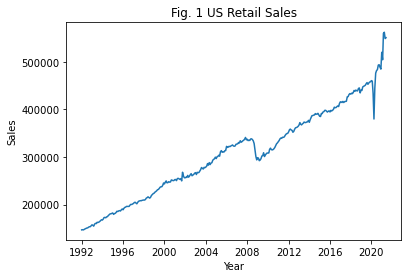

In [8]:
# Line plot

import matplotlib.pyplot as plt

plt.plot(final_retail_sales_df)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Fig. 1 US Retail Sales")
plt.show()

From the line plot we can infer that sales grew strongly over time although there were noticeable dips during 2008 and 2020 when there was an economic slowdown

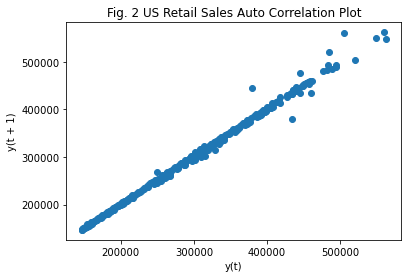

In [9]:
#Check Auto Correlation
pd.plotting.lag_plot(final_retail_sales_df,lag=1)
plt.title("Fig. 2 US Retail Sales Auto Correlation Plot")
plt.show()

We can see a large ball of observations along a diagonal line of the plot. It clearly shows strong correlation.

In [10]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

values = DataFrame(final_retail_sales_df)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.997354
t+1  0.997354  1.000000


In [11]:
# create and evaluate a static autoregressive model

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset
X = final_retail_sales_df.values
train, test = X[1:len(X)-12], X[len(X)-12:]

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 2.20424835e+03  8.78872100e-01 -3.60867752e-01  3.44408784e-01
  2.72624784e-01 -2.21552823e-01  1.65049627e-01  8.35543692e-03
 -1.94172346e-01  1.68899969e-01 -1.38659003e-02  3.17476649e-02
 -2.05193864e-01  3.51037306e-02  1.91318789e-01 -6.44582931e-02
  2.64535613e-01 -5.15897445e-01  3.40840732e-02  3.19259770e-01
 -1.57077398e-01  4.76717928e-03  1.51880104e-01 -2.81862225e-01
 -1.11082273e-02  1.60691634e-01 -1.70967353e-01  2.23886941e-01
 -1.37176649e-01  7.66363949e-02]
predicted=445515.494493, expected=481627.000000
predicted=422256.678222, expected=483716.000000
predicted=446066.473177, expected=493327.000000
predicted=451949.982676, expected=493991.000000
predicted=442227.695371, expected=488652.000000
predicted=450286.767245, expected=484782.000000
predicted=446613.649392, expected=520162.000000
predicted=438267.782201, expected=504458.000000
predicted=444921.157325, expected=559871.000000
predicted=470506.850108, expected=562269.000000
predicted=455556.

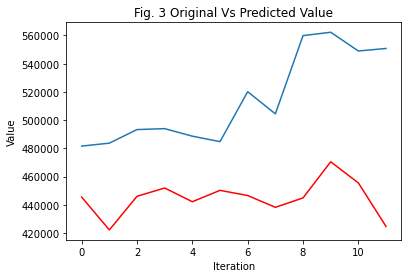

In [13]:
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("Fig. 3 Original Vs Predicted Value")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()